<a href="https://colab.research.google.com/github/Jayanthibhukya/DS-Video/blob/main/signlanguage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries**

In [ ]:
#Importing Libraries
import numpy as np    #provides support for large,multidimensional matrices
import pandas as pd   #for handling and analyzing structured data
import matplotlib.pyplot as plt #for visualization
import seaborn as sns   #extention to matplotlib,enhances graphics
import warnings
warnings.filterwarnings('ignore')    #ignores warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sign_mnist_train.csv')   #reading training dataset from drive

# **Data Exploring**

In [ ]:
dataset  #print dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [ ]:
dataset.shape    #shape of dataset

(27455, 785)

In [ ]:
dataset.info()  #prints information about dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
dataset.describe()  #describes the dataset

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


# **Data Preprocessing**

In [ ]:
dataset.duplicated().sum()        #count of duplicates

np.int64(0)

In [ ]:
def train_test_data(path):
  data=pd.read_csv(path);
  #Store dependent values i.e. label in y
  y=np.array([label if label<9 else label-1 for label in data['label']])
  #one hot encoding the categorical values
  y=pd.get_dummies(y).values
  #Store independent values i.e pixel values in x
  df=data.drop('label',axis=1)
  x = np.array([df.iloc[i].to_numpy().reshape((28, 28)) for i in range(len(df))]).astype(float)
  x = np.expand_dims(x, axis=3)

  return x,y

In [ ]:
x_train,y_train=train_test_data('/content/drive/MyDrive/Colab Notebooks/sign_mnist_train.csv')   #reading training dataset from drive
x_test,y_test=train_test_data('/content/drive/MyDrive/Colab Notebooks/sign_mnist_test.csv')

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(27455, 28, 28, 1) (27455, 24)
(7172, 28, 28, 1) (7172, 24)


#**Data visualization**

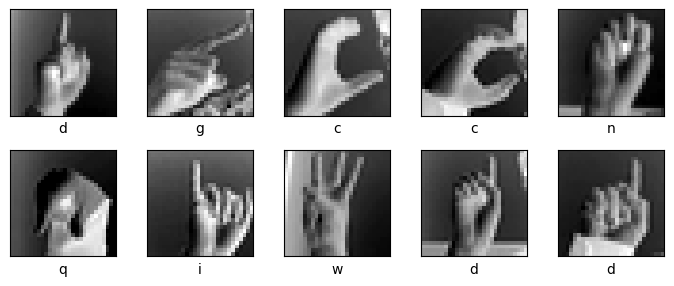

In [ ]:
#visualizing train data
import string
class_names = list(string.ascii_lowercase[:26].replace('j', '').replace('z', ''))

plt.figure(figsize=(7, 7))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].squeeze(), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train, axis=1)[i]])
plt.tight_layout()
plt.show()

#**Model Building**

In [ ]:
import tensorflow as tf
#CNN with 10 layers
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,
                           kernel_size=(3, 3),
                           activation='relu',
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(filters=64,
                           kernel_size=(3, 3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='softmax')
])

In [ ]:
model.summary() #Summary of model

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1600)           │         6,400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       409,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         6,168 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 442,264 (1.69 MB)

 Trainable params: 438,552 (1.67 MB)

 Non-trainable params: 3,712 (14.50 KB)

In [ ]:
#Configures how model trains
model.compile(
    optimizer='adam',   # Adam is an algorithm that adjusts weights smartly using momentum and learning rate tricks.
    loss='categorical_crossentropy',   # Perfect for multi-class classification and one-hot encoded labels.
    metrics=['accuracy']   # Tracks how often predictions match labels.
)

#**Data Augmentation**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Images are dynamically augmented
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)


#**Training Model**

In [ ]:
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.5862 - loss: 1.4091 - val_accuracy: 0.9129 - val_loss: 0.2615
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.9141 - loss: 0.2818 - val_accuracy: 0.9586 - val_loss: 0.1434
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.9486 - loss: 0.1706 - val_accuracy: 0.8928 - val_loss: 0.2854
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 38s 45ms/step - accuracy: 0.9562 - loss: 0.1413 - val_accuracy: 0.9745 - val_loss: 0.0677
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.9629 - loss: 0.1146 - val_accuracy: 0.9059 - val_loss: 0.2899
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9688 - loss: 0.0989 - val_accuracy: 0.9671 - val_loss: 0.0973
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9741 - loss: 0.0844 - val_accuracy: 0.9271 - val_loss: 0.1963
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9732 - loss: 0.0834 - 

#**Evaluation**

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9714 - loss: 0.0762
Test Accuracy: 0.97


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


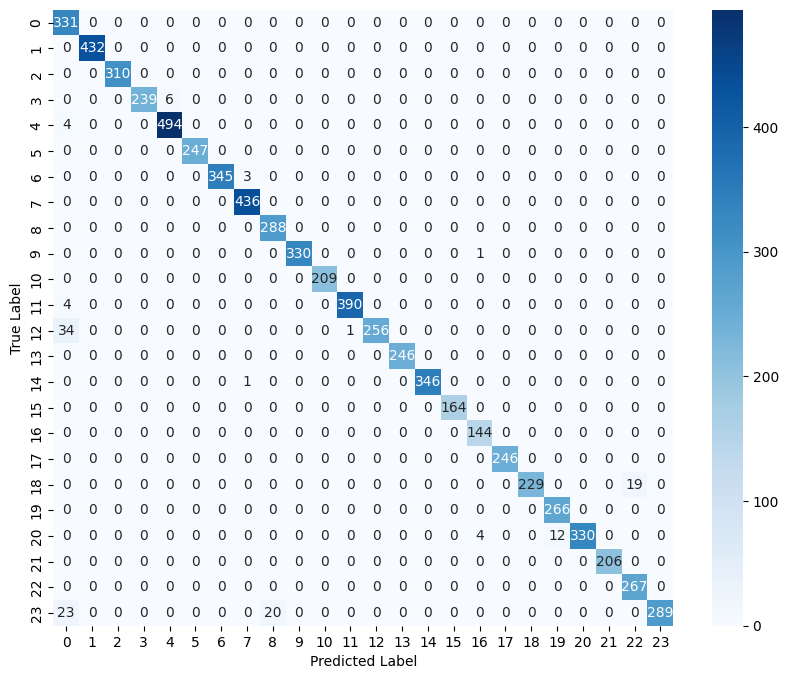

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       1.00      1.00      1.00       432
           2       1.00      1.00      1.00       310
           3       1.00      0.98      0.99       245
           4       0.99      0.99      0.99       498
           5       1.00      1.00      1.00       247
           6       1.00      0.99      1.00       348
           7       0.99      1.00      1.00       436
           8       0.94      1.00      0.97       288
           9       1.00      1.00      1.00       331
          10       1.00      1.00      1.00       209
          11       1.00      0.99      0.99       394
          12       1.00      0.88      0.94       291
          13       1.00      1.00      1.00       246
          14       1.00      1.00      1.00       347
          15       1.00      1.00      1.00       164
          16       0.97      1.00      0.98       144
          17       1.00    